In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import keras
import seaborn as sns

import urllib
import json
from tqdm import tqdm
import cv2
from time import time
import os

from moviepy.editor import VideoFileClip
from collections import OrderedDict

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

import shutil
import sys

import h5py

import cv2
import random
!pip install ipython-autotime
!pip install h5imagegenerator einops visualkeras
%load_ext autotime
import einops
import visualkeras
from h5imagegenerator import HDF5ImageGenerator
import albumentations
from albumentations import Compose, HorizontalFlip, RandomBrightnessContrast, RandomGamma

time: 280 ms (started: 2024-05-02 18:22:07 +00:00)


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive
time: 2.73 s (started: 2024-05-02 18:22:40 +00:00)


In [3]:
class CustomDataGen(tf.keras.utils.Sequence):
    def __init__(self, src, x_key, y_key, batch_size, shuffle, vid_shape, num_classes, mode='train', **kwargs):
        super().__init__(**kwargs)
        with h5py.File(src, 'r') as f:
            self.num_samples = len(f[x_key])
        self.src = src
        self.x_key = x_key
        self.y_key = y_key
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(self.num_samples)
        self.mode = mode
        self.vid_shape = vid_shape
        self.num_classes = num_classes

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.num_samples / self.batch_size))

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.num_samples)
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        X = np.zeros((batch_size, *self.vid_shape))
        y = np.zeros((batch_size, self.num_classes))
        with h5py.File(self.src, 'r') as f:

            for i in range(batch_size):
              X[i,:,:,:,:] = f[self.x_key][indexes[i],:,:,:,:]
              y[i,:] = f[self.y_key][indexes[i],:]

            if self.mode == 'train':
                return X, y
            else:
                return X

time: 1.37 ms (started: 2024-05-02 18:22:46 +00:00)


In [ ]:
"""
vid_shape = [50, 176, 176, 3]

#set input data parameters
img_height = vid_shape[1]
img_width = vid_shape[2]
n_frames = vid_shape[0]
n_channels = vid_shape[3]
n_classes = 5
if tf.test.gpu_device_name() == '':
  batch_size = 2 #CPU batch size
  print('CPU Batch Size enabled: '+str(batch_size))
else:
  batch_size = 10 #GPU batch size
  print('GPU Batch Size enabled: '+str(batch_size))

my_augmenter = Compose([
    RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    RandomGamma(),
])

src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/train/FiveClass_Dataset.h5'
#src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/train/HundredClass_Dataset.h5'
train_generator = HDF5ImageGenerator(
        src=src,
        X_key='train_x',
        y_key='train_y',
        shuffle=True,
        # num_classes=n_classes,
        labels_encoding=False, #False (labels are already one-hot encoded in h5),
        batch_size=batch_size,
        augmenter=my_augmenter,
        mode='train')
n_classes = 5
src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/val/FiveClass_Dataset.h5'
#src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/val/HundredClass_Dataset.h5'
val_generator = HDF5ImageGenerator(
        src=src,
        X_key='val_x',
        y_key='val_y',
        # num_classes=n_classes,
        labels_encoding=False,
        batch_size=batch_size,
        mode='train')
n_classes = 5
src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/test/FiveClass_Dataset.h5'
#src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/test/HundredClass_Dataset.h5'
test_generator = HDF5ImageGenerator(
        src=src,
        X_key='test_x',
        y_key='test_y',
        # num_classes=n_classes,
        labels_encoding=False,
        batch_size=batch_size,
        mode='train')

#f = h5py.File('/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/val/FiveClass_Dataset.h5', 'r')
#val_x = tf.convert_to_tensor(f['val_x'][:])
#val_y = tf.convert_to_tensor(f['val_y'][:])

#f.close()  # MUST RUN THIS BEFORE FITTING
"""

"\nvid_shape = [50, 176, 176, 3]\n\n#set input data parameters\nimg_height = vid_shape[1]\nimg_width = vid_shape[2]\nn_frames = vid_shape[0]\nn_channels = vid_shape[3]\nn_classes = 5\nif tf.test.gpu_device_name() == '':\n  batch_size = 2 #CPU batch size\n  print('CPU Batch Size enabled: '+str(batch_size))\nelse:\n  batch_size = 10 #GPU batch size\n  print('GPU Batch Size enabled: '+str(batch_size))\n\nmy_augmenter = Compose([\n    RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),\n    RandomGamma(),\n])\n\nsrc = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/train/FiveClass_Dataset.h5'\n#src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/train/HundredClass_Dataset.h5'\ntrain_generator = HDF5ImageGenerator(\n        src=src,\n        X_key='train_x',\n        y_key='train_y',\n        shuffle=True,\n        # num_classes=n_classes,\n        labels_encoding=False, #False (labels are already one-hot encoded in h5),\n        batch

In [4]:
vid_shape = [50, 176, 176, 3]

#set input data parameters
img_height = vid_shape[1]
img_width = vid_shape[2]
n_frames = vid_shape[0]
n_channels = vid_shape[3]

num_class_run = 100

#model_run = 'Conv2Plus1D'
#model_run = 'Conv3D'
model_run = 'ConvLSTM'

if num_class_run ==5:
  n_classes = 5
else:
  n_classes = 100
if tf.test.gpu_device_name() == '':
  batch_size = 3 #CPU batch size
  print('CPU Batch Size enabled: '+str(batch_size))
else:
  batch_size = 6 #GPU batch size
  print('GPU Batch Size enabled: '+str(batch_size))

my_augmenter = Compose([
    RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    RandomGamma(),
])


if num_class_run ==5:
  src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/train/FiveClass_Dataset.h5'
else:
  src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/HundredClass_Dataset.h5'
train_generator = CustomDataGen(src = src, x_key = 'train_x', y_key='train_y', batch_size=batch_size, shuffle=True, vid_shape = vid_shape, num_classes = n_classes, mode='train')


if num_class_run ==5:
  src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/val/FiveClass_Dataset.h5'
else:
  src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/val/HundredClass_Dataset.h5'

val_generator = CustomDataGen(src = src, x_key = 'val_x', y_key='val_y', batch_size=batch_size, shuffle=True, vid_shape = vid_shape, num_classes = n_classes, mode='train')


if num_class_run ==5:
  src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/test/FiveClass_Dataset.h5'
else:
  src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/test/HundredClass_Dataset.h5'

test_generator = CustomDataGen(src = src, x_key = 'test_x', y_key='test_y', batch_size=batch_size, shuffle=True, vid_shape = vid_shape, num_classes = n_classes, mode='train')




GPU Batch Size enabled: 6
time: 180 ms (started: 2024-05-02 18:22:51 +00:00)


In [5]:
frames, label = next(iter(train_generator))


time: 2.34 s (started: 2024-05-02 18:22:59 +00:00)


### Model From Tensorflow

this one is significantly deeper than the simple one we had before, it is modeled after RESNET, so I figured we can try this to see if it improves accuracy.

In [6]:
# Clear all previously registered custom objects
keras.saving.get_custom_objects().clear()

@keras.saving.register_keras_serializable()
class Conv2D_LSTM_Block(keras.layers.Layer):
  def __init__(self, filters, kernel_size, padding):
    """
      A ConvLSTM2D layer
    """
    super().__init__()
    self.seq = keras.Sequential([
        layers.ConvLSTM2D(filters=filters,
                      kernel_size=(kernel_size[0], kernel_size[1]),
                      padding=padding)
    ])

  def call(self, x):
    return self.seq(x)

time: 1.05 ms (started: 2024-05-02 18:23:11 +00:00)


In [7]:
@keras.saving.register_keras_serializable()
class Conv3D_Block(keras.layers.Layer):
  def __init__(self, filters, kernel_size, padding):
    """
      A 3D Convolutional layer
    """
    super().__init__()
    self.seq = keras.Sequential([
        layers.Conv3D(filters=filters,
                      kernel_size=(kernel_size[0], kernel_size[1], kernel_size[2]),
                      padding=padding),
    ])

  def call(self, x):
    return self.seq(x)

time: 839 µs (started: 2024-05-02 18:23:14 +00:00)


In [8]:
@keras.saving.register_keras_serializable()
class Conv2Plus1D(keras.layers.Layer):
  def __init__(self, filters, kernel_size, padding):
    """
      A sequence of convolutional layers that first apply the convolution operation over the
      spatial dimensions, and then the temporal dimension.
    """
    super().__init__()
    self.seq = keras.Sequential([
        # Spatial decomposition
        layers.Conv3D(filters=filters,
                      kernel_size=(1, kernel_size[1], kernel_size[2]),
                      padding=padding),
        # Temporal decomposition
        layers.Conv3D(filters=filters,
                      kernel_size=(kernel_size[0], 1, 1),
                      padding=padding)
        ])

  def call(self, x):
    return self.seq(x)

time: 757 µs (started: 2024-05-02 18:23:17 +00:00)


In [9]:
@keras.saving.register_keras_serializable()
class ResidualMain(keras.layers.Layer):
  """
    Residual block of the model with convolution, layer normalization, and the
    activation function, ReLU.
  """
  def __init__(self, filters, kernel_size):
    super().__init__()
    self.seq = keras.Sequential([
        Conv2Plus1D(filters=filters,
                    kernel_size=kernel_size,
                    padding='same'),
        layers.LayerNormalization(),
        layers.ReLU(),
        Conv2Plus1D(filters=filters,
                    kernel_size=kernel_size,
                    padding='same'),
        layers.LayerNormalization()
    ])

  def call(self, x):
    return self.seq(x)
@keras.saving.register_keras_serializable()
class Project(keras.layers.Layer):
  """
    Project certain dimensions of the tensor as the data is passed through different
    sized filters and downsampled.
  """
  def __init__(self, units):
    super().__init__()
    self.seq = keras.Sequential([
        layers.Dense(units),
        layers.LayerNormalization()
    ])

  def call(self, x):
    return self.seq(x)

@keras.saving.register_keras_serializable()
def add_residual_block(input, filters, kernel_size):
  """
    Add residual blocks to the model. If the last dimensions of the input data
    and filter size does not match, project it such that last dimension matches.
  """
  out = ResidualMain(filters,
                     kernel_size)(input)

  res = input
  # Using the Keras functional APIs, project the last dimension of the tensor to
  # match the new filter size
  if out.shape[-1] != input.shape[-1]:
    res = Project(out.shape[-1])(res)

  return layers.add([res, out])

@keras.saving.register_keras_serializable()
class ResizeVideo(keras.layers.Layer):
  def __init__(self, height, width):
    super().__init__()
    self.height = height
    self.width = width
    self.resizing_layer = layers.Resizing(self.height, self.width)

  def call(self, video):
    """
      Use the einops library to resize the tensor.

      Args:
        video: Tensor representation of the video, in the form of a set of frames.

      Return:
        A downsampled size of the video according to the new height and width it should be resized to.
    """
    # b stands for batch size, t stands for time, h stands for height,
    # w stands for width, and c stands for the number of channels.
    old_shape = einops.parse_shape(video, 'b t h w c')
    images = einops.rearrange(video, 'b t h w c -> (b t) h w c')
    images = self.resizing_layer(images)
    videos = einops.rearrange(
        images, '(b t) h w c -> b t h w c',
        t = old_shape['t'])
    return videos

time: 1.48 ms (started: 2024-05-02 18:23:20 +00:00)


In [10]:
# MODEL

input_shape = (None, vid_shape[0], vid_shape[1], vid_shape[2], vid_shape[3])
input = layers.Input(shape=(input_shape[1:]))
x = input

if model_run == 'Conv2Plus1D':
  x = Conv2Plus1D(filters=16, kernel_size=(3, 7, 7), padding='same')(x)
elif model_run == 'Conv3D':
  x = Conv3D_Block(filters=16, kernel_size=(3, 7, 7), padding='same')(x)
else:
  x = Conv2D_LSTM_Block(filters=16, kernel_size=(7, 7), padding='same')(x)

if model_run != 'ConvLSTM':
  x = layers.MaxPool3D(pool_size = (1,2,2), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU(0.3)(x)
  x = ResizeVideo(vid_shape[1] // 2, vid_shape[2] // 2)(x)
else:
  x = layers.MaxPool2D(pool_size=(2,2), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU(0.3)(x)


if model_run == 'Conv2Plus1D':
  x = Conv2Plus1D(filters=32, kernel_size=(3, 7, 7), padding='same')(x)
elif model_run == 'Conv3D':
  x = Conv3D_Block(filters=32, kernel_size=(3, 7, 7), padding='same')(x)
else:
  x = layers.Conv2D(filters=32, kernel_size=(7, 7), padding='same')(x)
  x = layers.MaxPool2D(pool_size = (2,2), padding='same')(x)

if model_run != 'ConvLSTM':
  x = layers.MaxPool3D(pool_size = (1,2,2), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU(0.3)(x)
  x = ResizeVideo(vid_shape[1] // 2, vid_shape[2] // 2)(x)
else:
  x = layers.MaxPool2D(pool_size=(2,2), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU(0.3)(x)

if model_run == 'Conv2Plus1D':
  x = Conv2Plus1D(filters=64, kernel_size=(3, 7, 7), padding='same')(x)
elif model_run == 'Conv3D':
  x = Conv3D_Block(filters=64, kernel_size=(3, 7, 7), padding='same')(x)
else:
  x = layers.Conv2D(filters=64, kernel_size=(7, 7), padding='same')(x)

if model_run != 'ConvLSTM':
  x = layers.MaxPool3D(pool_size = (1,2,2), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU(0.3)(x)
  x = ResizeVideo(vid_shape[1] // 2, vid_shape[2] // 2)(x)
else:
  x = layers.MaxPool2D(pool_size=(2,2), padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU(0.3)(x)



if model_run != 'ConvLSTM':

  x = add_residual_block(x, 64, (3, 3, 3))
  x = ResizeVideo(vid_shape[1] // 4, vid_shape[2] // 4)(x)

  x = add_residual_block(x, 32, (3, 3, 3))
  x = ResizeVideo(vid_shape[1] // 4, vid_shape[2] // 4)(x)

  # Block 1
  x = add_residual_block(x, 16, (3, 3, 3))
  x = ResizeVideo(vid_shape[1] // 4, vid_shape[2] // 4)(x)

  # Block 2
  x = add_residual_block(x, 32, (3, 3, 3))
  x = ResizeVideo(vid_shape[1] // 8, vid_shape[2] // 8)(x)

  # Block 3
  x = add_residual_block(x, 64, (3, 3, 3))
  x = ResizeVideo(vid_shape[1] // 16, vid_shape[2] // 16)(x)

  # Block 4
  x = add_residual_block(x, 128, (3, 3, 3))

  x = layers.GlobalAveragePooling3D()(x)
else:

  x = layers.GlobalAveragePooling2D()(x)

# Classifier
x = layers.Flatten()(x)
x = layers.Dense(1024)(x)
x = layers.LeakyReLU(0.3)(x)
x=  layers.Dropout(0.25)(x)

x = layers.Dense(128)(x)
x = layers.LeakyReLU(0.3)(x)
x=  layers.Dropout(0.25)(x)

x = layers.Dense(n_classes)(x)
# x = layers.Softmax()(x)

model = keras.Model(input, x)

time: 968 ms (started: 2024-05-02 18:23:26 +00:00)


In [11]:
if num_class_run == 5:
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
else:
    metrics = [
        tf.keras.metrics.TopKCategoricalAccuracy(
            k=1, name='top_1', dtype=tf.float32),
        tf.keras.metrics.TopKCategoricalAccuracy(
            k=5, name='top_5', dtype=tf.float32),
        tf.keras.metrics.TopKCategoricalAccuracy(
            k=50, name='top_50', dtype=tf.float32),
        tf.keras.metrics.CategoricalAccuracy(),
    ]

model.compile(loss = keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = metrics)

time: 29 ms (started: 2024-05-02 18:23:38 +00:00)


In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 176, 176, 3   0         
                             )]                                  
                                                                 
 conv2d_lstm__block (Conv2D  (None, 176, 176, 16)      59648     
 _LSTM_Block)                                                    
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 88, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 88, 88, 16)        64        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 88, 88, 16)        0     

In [13]:
history = model.fit(x = train_generator,
                    epochs = 1,
                    validation_data = val_generator,
                    shuffle=True)

506/506 [==============================] - 4633s 9s/step - loss: 2.8939 - top_1: 0.3267 - top_5: 0.6594 - top_50: 0.8254 - categorical_accuracy: 0.3267 - val_loss: 2.7283 - val_top_1: 0.3604 - val_top_5: 0.6781 - val_top_50: 0.8519 - val_categorical_accuracy: 0.3604
time: 1h 17min 15s (started: 2024-05-02 18:24:15 +00:00)


In [14]:
print(model_run)
results = model.evaluate(test_generator, return_dict = True)
print(results)


ConvLSTM
76/76 [==============================] - 311s 4s/step - loss: 2.8015 - top_1: 0.3289 - top_5: 0.6645 - top_50: 0.8268 - categorical_accuracy: 0.3289
{'loss': 2.8014702796936035, 'top_1': 0.32894736528396606, 'top_5': 0.6644737124443054, 'top_50': 0.8267543911933899, 'categorical_accuracy': 0.32894736528396606}
time: 5min 27s (started: 2024-05-02 19:41:30 +00:00)


In [15]:
if num_class_run == 5:
  model.save('/content/drive/MyDrive/CSCI1470_Final_Project/Saved_Models/FiveClass_'+model_run+'Model_normlr.keras')
else:
  model.save('/content/drive/MyDrive/CSCI1470_Final_Project/Saved_Models/HundredClass_'+model_run+'Model_normlr.keras')

time: 248 ms (started: 2024-05-02 19:46:57 +00:00)


### Model Visualization and Evaluation

In [ ]:
# Accessing accuracy values from the history object
train_accuracy = history.history['categorical_accuracy']
val_accuracy = history.history['val_categorical_accuracy']

if num_class_run == 100:
  val_top1_accuracy = history.history['val_top_1']
  val_top5_accuracy = history.history['val_top_5']
  val_top50_accuracy = history.history['val_top_50']

# Number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plotting
plt.ylim(0, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
if num_class_run == 100:
  plt.plot(epochs, val_top1_accuracy, 'p', label='Validation Top 1 accuracy')
  plt.plot(epochs, val_top5_accuracy, 'g', label='Validation Top 5 accuracy')
  plt.plot(epochs, val_top50_accuracy, 'k', label='Validation Top 50 accuracy' )
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
if num_class_run == 5:
  plt.savefig('/content/drive/MyDrive/CSCI1470_Final_Project/Pres_Figures/FiveClass_Categorical_Accuracy'+model_run+'.png')
else:
  plt.savefig('/content/drive/MyDrive/CSCI1470_Final_Project/Pres_Figures/HundredClass_Categorical_Accuracy'+model_run+'.png')
plt.show()

In [ ]:
def plot_history(history):
  """
    Plotting training and validation learning curves.

    Args:
      history: model history with all the metric measures
  """
  fig, (ax1, ax2) = plt.subplots(2)

  fig.set_size_inches(18.5, 10.5)

  # Plot loss
  ax1.set_title('Loss')
  ax1.plot(history.history['loss'], label = 'train')
  ax1.plot(history.history['val_loss'], label = 'test')
  ax1.set_ylabel('Loss')

  # Determine upper bound of y-axis
  max_loss = max(history.history['loss'] + history.history['val_loss'])

  ax1.set_ylim([0, np.ceil(max_loss)])
  ax1.set_xlabel('Epoch')
  ax1.legend(['Train', 'Validation'])

  # Plot accuracy
  ax2.set_title('Accuracy')
  ax2.plot(history.history['categorical_accuracy'],  label = 'train')
  ax2.plot(history.history['val_categorical_accuracy'], label = 'validation')
  ax2.set_ylabel('Accuracy')
  ax2.set_ylim([0, 1])
  ax2.set_xlabel('Epoch')
  ax2.legend(['Train', 'Validation'])

  if num_class_run == 5:
    plt.savefig('/content/drive/MyDrive/CSCI1470_Final_Project/Pres_Figures/FiveClass_Loss'+model_run+'.png')
  else:
    plt.savefig('/content/drive/MyDrive/CSCI1470_Final_Project/Pres_Figures/HundredClass_Loss'+model_run+'.png')

  plt.show()

plot_history(history)

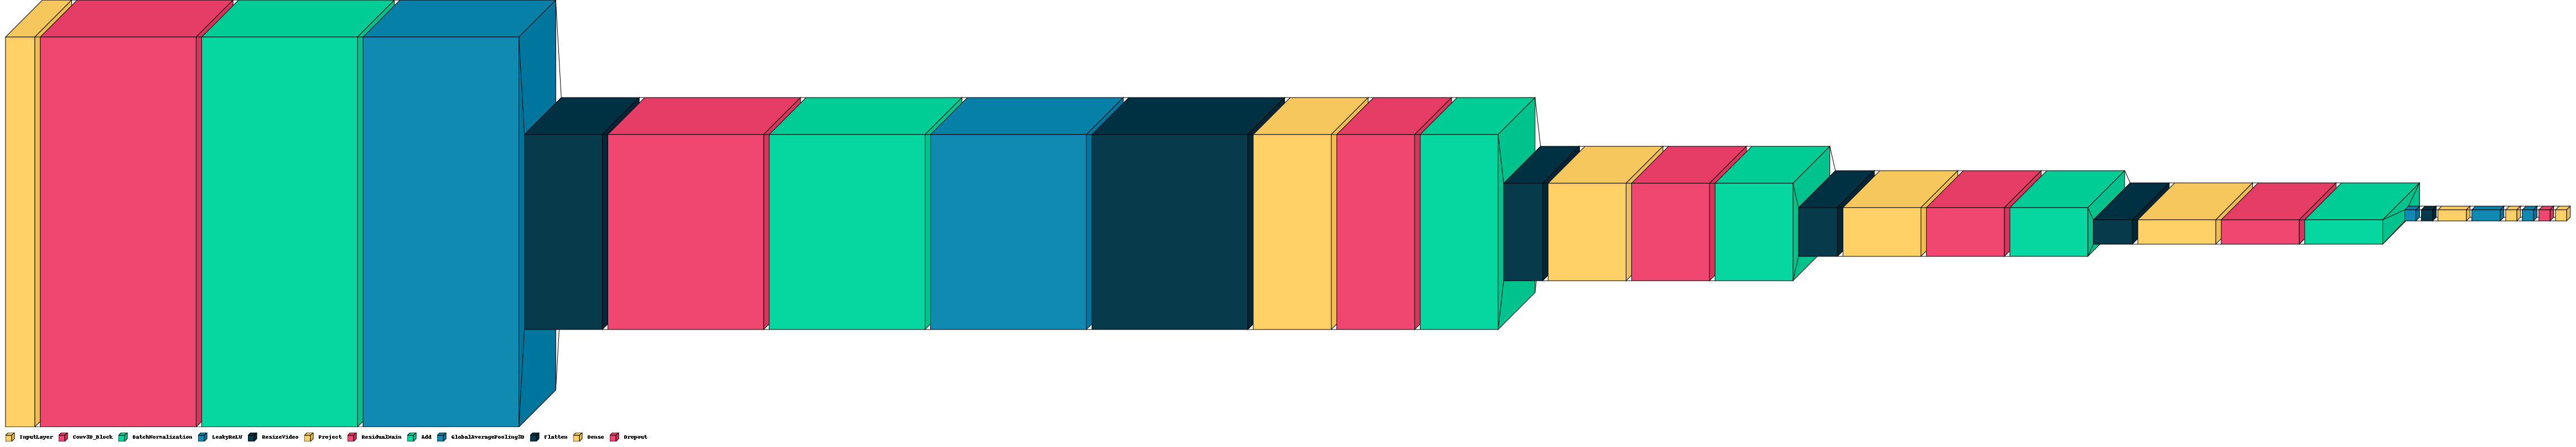

In [ ]:
# Block Visualization
visualkeras.layered_view(model, legend=True)

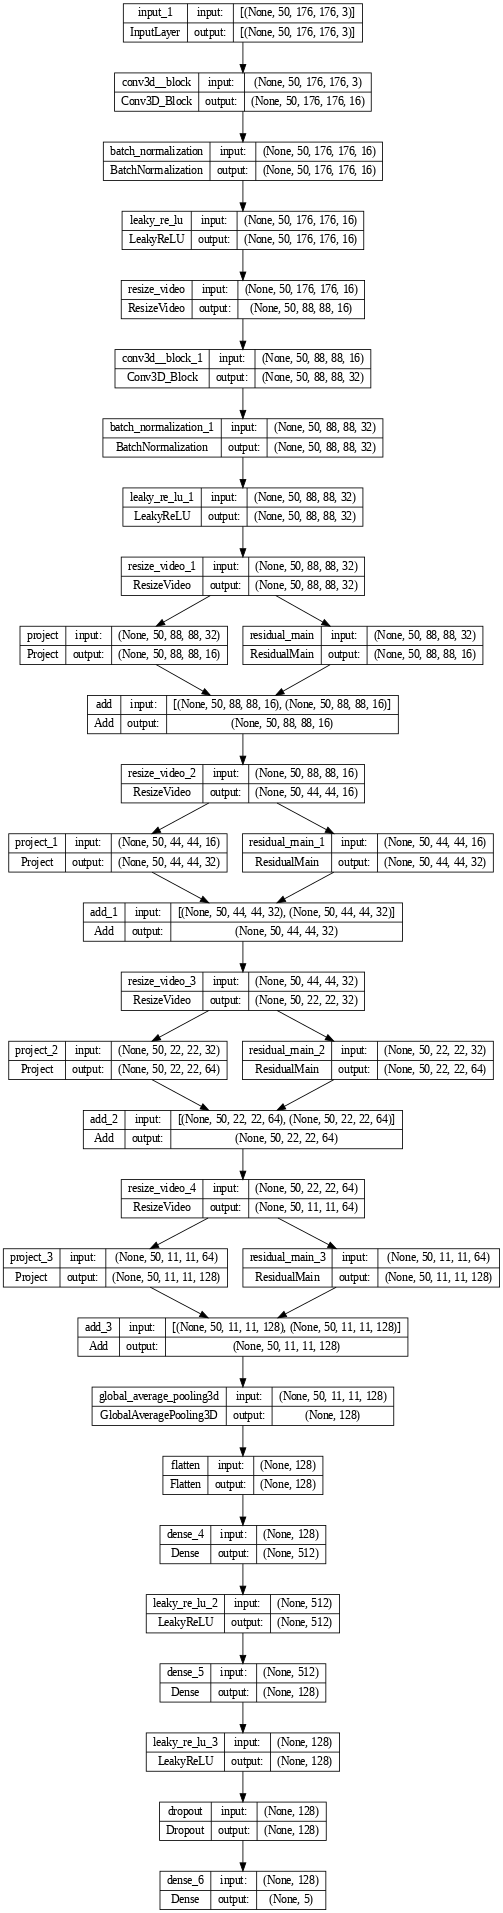

In [ ]:
# Model Diagram
keras.utils.plot_model(model, expand_nested=True, dpi=60, show_shapes=True)

In [24]:

def plot_confusion_matrix(actual, predicted, labels, ds_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=False, fmt='g')
  #sns.set(rc={'figure.figsize':(12, 12)})
  #sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of action recognition for ' + ds_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0)
  ax.set_xticks(np.arange(100), labels)
  ax.set_yticks(np.arange(100), labels)

  if num_class_run == 5:
    plt.savefig('/content/drive/MyDrive/CSCI1470_Final_Project/Pres_Figures/FiveClass_ConfusionMatrix'+model_run+'.png')
  else:
    plt.savefig('/content/drive/MyDrive/CSCI1470_Final_Project/Pres_Figures/HundredClass_ConfusionMatrix'+model_run+'.png')
  return cm

time: 864 µs (started: 2024-05-02 20:01:04 +00:00)


In [17]:
predicted_labels = model.predict(test_generator)

76/76 [==============================] - 408s 5s/step
time: 6min 52s (started: 2024-05-02 19:46:58 +00:00)


In [18]:
len(predicted_labels)

456

time: 2.55 ms (started: 2024-05-02 19:53:50 +00:00)


True


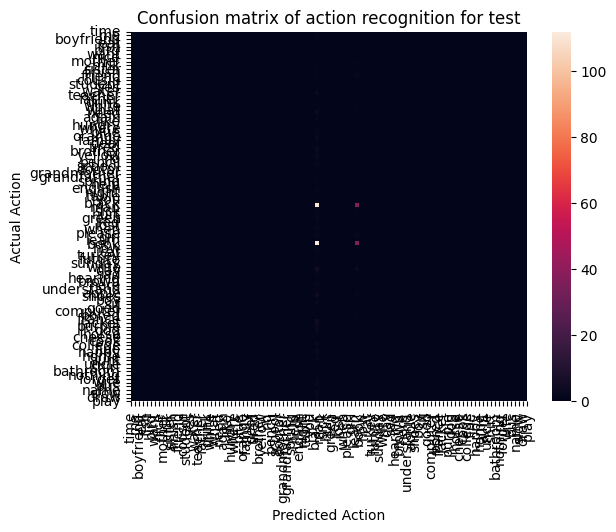

time: 1.81 s (started: 2024-05-02 20:01:08 +00:00)


In [25]:
actual = np.argmax(tf.nn.softmax(predicted_labels), axis=1)
if num_class_run ==5:
  src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_Five_Classes/test/FiveClass_Dataset.h5'
  f = h5py.File(src, 'r')

  actual_labels = f['test_y'][:]
  predicted = np.argmax(actual_labels, axis =1)
  labels = ['eat', 'fish', 'bird', 'want', 'nice']
  f.close()
  plot_confusion_matrix(predicted[:18], actual, labels, 'test')
else:
  types = ('*.mp4')
  path = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/train/'
  labels = os.listdir(path)
  if 'HundredClass_Dataset.h5' in labels:
    print(True)
    labels.remove('HundredClass_Dataset.h5')
  src = '/content/drive/MyDrive/CSCI1470_Final_Project/Top_100_Classes/test/HundredClass_Dataset.h5'
  f = h5py.File(src, 'r')

  actual_labels = f['test_y'][:]
  predicted = np.argmax(actual_labels, axis =1)
  f.close()
  cm = plot_confusion_matrix(predicted[:len(predicted_labels)], actual, labels, 'test')

In [26]:
#model = keras.models.load_model('/content/drive/MyDrive/CSCI1470_Final_Project/Saved_Models/HundredClass_'+model_run+'Model_normlr.keras')

time: 836 ms (started: 2024-05-02 20:02:08 +00:00)


In [ ]:
#from google.colab import runtime
#runtime.unassign()